# Proyecto 1 - Parte final (Core)

Previo a cualquier cosa, cargamos el dataset. Como no hubo ninguna limpieza de datos ya que todo estaba bien, se carga el dataset original.

In [370]:
import pandas as pd


camino_ds = "../data/retail_sales_dataset.csv"
df = pd.read_csv(camino_ds, delimiter=",")

Agregamos Mes de Venta

In [371]:
df["Month"] = pd.DatetimeIndex(df["Date"]).month

Agregamos Age Range

In [372]:
# Rangos etarios obtenidos de este sitio: https://www.palbin.com/es/blog/p1009-que-edad-tienen-tus-compradores-plan-de-marketing-digital.html
def obtener_rango_etario(x):
    if 0 <= x < 18:
        return "0-18"

    if 18 <= x < 25:
        return "18-25"

    if 25 <= x < 40:
        return "25-40"

    if 40 <= x < 65:
        return "40-65"
    
    return "65+"


df["Age Range"] = df["Age"].apply(obtener_rango_etario).astype("category")

Graficamos mapa de correlación

                Transaction ID       Age  ...  Total Amount     Month
Transaction ID        1.000000  0.065191  ...     -0.075034  0.047538
Age                   0.065191  1.000000  ...     -0.060568 -0.000640
Quantity             -0.026623 -0.023737  ...      0.373707 -0.021803
Price per Unit       -0.060837 -0.038423  ...      0.851925 -0.008161
Total Amount         -0.075034 -0.060568  ...      1.000000 -0.005197
Month                 0.047538 -0.000640  ...     -0.005197  1.000000

[6 rows x 6 columns]


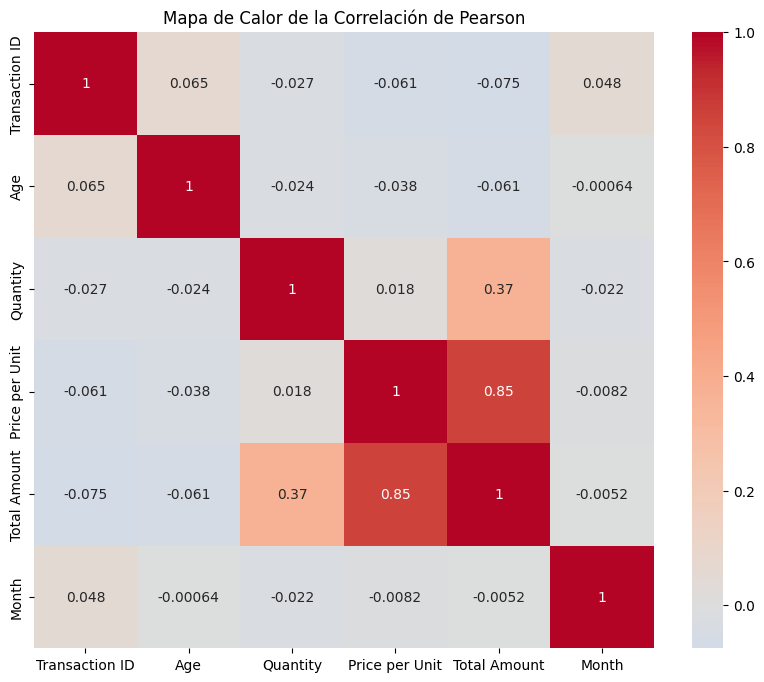

In [373]:
from eda_utils import graficar_mapa_correlacion, obtener_columnas_numericas_df

columnas_numericas = obtener_columnas_numericas_df(df)

graficar_mapa_correlacion(df, columnas_numericas)

## Parte 2: Código de Parte 2 resumido.

In [374]:
from eda_utils import (
    obtener_columnas_numericas_df,
    obtener_columnas_categoricas_df,
)

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

columnas_numericas = obtener_columnas_numericas_df(df)
columnas_categoricas = obtener_columnas_categoricas_df(df)

columnas_numericas_prediccion = [
    # "Month",
    # "Age",
    # "Quantity",
    "Price per Unit",
    # "Total Amount",

]

columnas_categoricas_prediccion = [
    "Gender",
    "Age Range",
    "Product Category",
]

campo_salida = "Total Amount"


X = df[[*columnas_numericas_prediccion] + [*columnas_categoricas_prediccion]]
y = df[campo_salida]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=df[[*columnas_categoricas_prediccion]]
)

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler, columnas_numericas_prediccion),
        ("cat", categorical_transformer, columnas_categoricas_prediccion),
    ],
    remainder="passthrough"
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

## Parte 3: Benchmarking de Técnicas de Machine Learning

### 1. Selección de Modelos:

* Entrenar y evaluar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost y LGBM).
* Utilizar validación cruzada para evaluar el rendimiento de los modelos.

Se realizarán ambos ítems en un solo paso.

#### KNN

In [375]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV



pipeline_knn = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', GridSearchCV(
            KNeighborsRegressor(),
            param_grid={
                "n_neighbors": list(range(1, 100)),
            },
            cv=5,
            refit=True,
            verbose=2,
        )),
    ]
)

pipeline_knn.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Price per Unit']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Age Range',
                                                   'Product Category'])])),
                ('model',
                 GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
                              param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10, 11, 12, 13,
                                                          14, 15, 16, 17, 18,
                                                          19, 20, 21, 22, 23,
                                                          24, 25, 26, 27, 28,
                                                          29, 30, ...]},
                              verbose=2))])

In [376]:
params_knn = pipeline_knn.steps[-1][1].best_params_

params_knn

{'n_neighbors': 46}

#### Random Forests

In [377]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


pipeline_rf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', GridSearchCV(
            RandomForestRegressor(random_state=42),
            param_grid={ 
                'n_estimators': list(range(1, 51)),
                'max_depth': list(range(1, 10)),
            },
            cv=5,
            refit=True,
            verbose=2,
        )),
    ]
)

pipeline_rf.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV] END ........................max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=2; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=2; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=2; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=2; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=2; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=3; total time=   0.0s
[CV] END ........................max_depth=1,

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Price per Unit']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Age Range',
                                                   'Product Category'])])),
                ('model',
                 GridSearchCV(cv=5,
                              estimator=RandomForestRegressor(random_state=42),
                              param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9],
                                          'n_estimators': [1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29, 30, ...]},
                              verbose=2))])

In [378]:
params_rf = pipeline_rf.steps[-1][1].best_params_

params_rf

{'max_depth': 2, 'n_estimators': 3}

#### Regresión Lineal

In [379]:
from sklearn.linear_model import LinearRegression


pipeline_lr = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression()),
    ]
)

pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Price per Unit']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Age Range',
                                                   'Product Category'])])),
                ('model', LinearRegression())])

#### LGBM

In [380]:
import lightgbm as lgb


# No se necesitan transformaciones de columnas categoricas ya que el modelo LGBM los maneja por defecto
preprocessor_lgb = ColumnTransformer(
    transformers=[
        ("num", scaler, columnas_numericas_prediccion),
    ]
)

pipeline_lgbm = Pipeline(
    steps=[
        ('preprocessor', preprocessor_lgb),
        ('model', lgb.LGBMRegressor(random_state=0)),
    ]
)

pipeline_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 1
[LightGBM] [Info] Start training from score 456.235714
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Price per Unit'])])),
                ('model', LGBMRegressor(random_state=0))])

### 1. Selección de Modelos:

* Comparación de Modelos:

Comparar los modelos utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC. Seleccionar el mejor modelo basado en las métricas obtenidas.


Importamos las librerías para benchmarking

In [381]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

#### KNN

In [382]:
# Realizar predicciones
y_pred_knn = pipeline_knn.predict(X_test)

# Evaluar el modelo
rmse_knn = root_mean_squared_error(y_test, y_pred_knn)
mse_knn = rmse_knn ** 2
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print(f'Error Cuadrático Medio: {mse_knn}')
print(f'Error Cuadrático Medio Raíz: {rmse_knn}')
print(f'R-cuadrado: {r2_knn}')
print(f'Error Absoluto Medio: {mae_knn}')

Error Cuadrático Medio: 90700.23790957783
Error Cuadrático Medio Raíz: 301.1648019101466
R-cuadrado: 0.7072001342886491
Error Absoluto Medio: 187.34963768115944


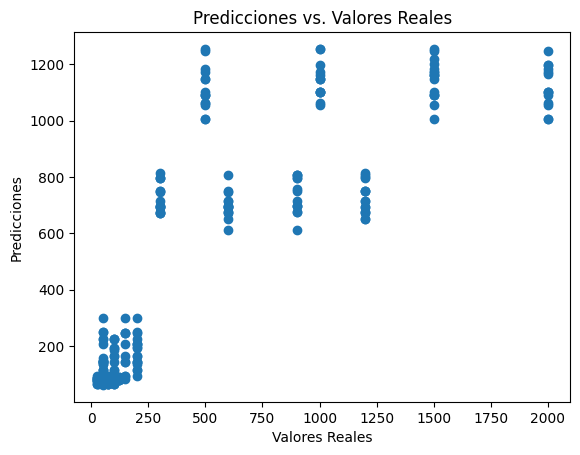

In [383]:
# Gráfico de dispersión de las predicciones vs. valores reales
plt.scatter(y_test, y_pred_knn)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

#### Random Forests

In [384]:
# Realizar predicciones
y_pred_rf = pipeline_rf.predict(X_test)

# Evaluar el modelo
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
mse_rf = rmse_rf ** 2
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Error Cuadrático Medio: {mse_rf}')
print(f'Error Cuadrático Medio Raíz: {rmse_rf}')
print(f'R-cuadrado: {r2_rf}')
print(f'Error Absoluto Medio: {mae_rf}')

Error Cuadrático Medio: 87917.10102673782
Error Cuadrático Medio Raíz: 296.5081803706903
R-cuadrado: 0.7161846984346029
Error Absoluto Medio: 185.762268012624


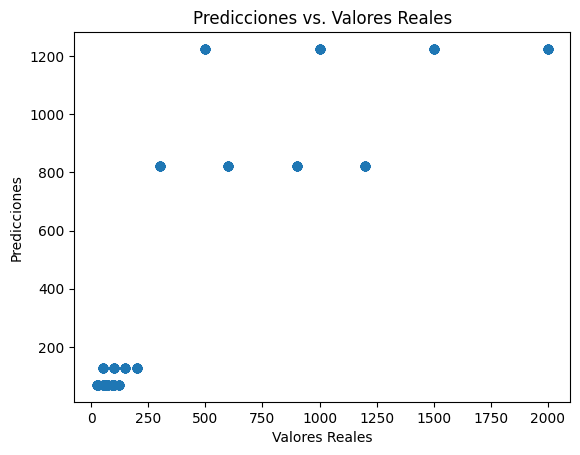

In [385]:
# Gráfico de dispersión de las predicciones vs. valores reales
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

#### Regresión Lineal

In [386]:
# Realizar predicciones
y_pred_lr = pipeline_lr.predict(X_test)

# Evaluar el modelo
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)
mse_lr = rmse_lr ** 2
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f'Error Cuadrático Medio: {mse_lr}')
print(f'Error Cuadrático Medio Raíz: {rmse_lr}')
print(f'R-cuadrado: {r2_lr}')
print(f'Error Absoluto Medio: {mae_lr}')

Error Cuadrático Medio: 86751.32333333333
Error Cuadrático Medio Raíz: 294.5357759820245
R-cuadrado: 0.7199480794349749
Error Absoluto Medio: 187.31


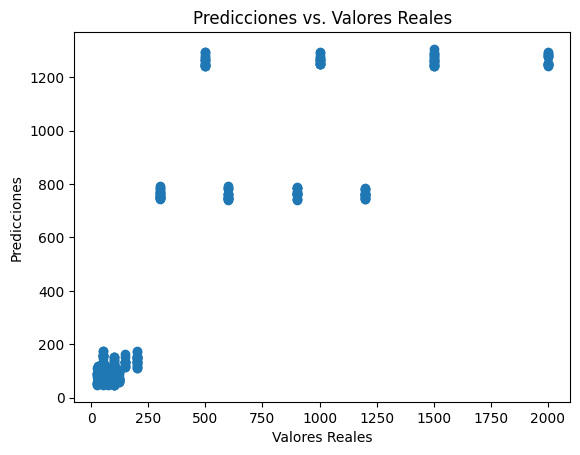

In [387]:
# Gráfico de dispersión de las predicciones vs. valores reales
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

#### LGBM

In [388]:
# Realizar predicciones
y_pred_lgbm = pipeline_lgbm.predict(X_test)

# Evaluar el modelo
rmse_lgbm = root_mean_squared_error(y_test, y_pred_lgbm)
mse_lgbm = rmse_lgbm ** 2
r2_lgbm = r2_score(y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)

print(f'Error Cuadrático Medio: {mse_lgbm}')
print(f'Error Cuadrático Medio Raíz: {rmse_lgbm}')
print(f'R-cuadrado: {r2_lgbm}')
print(f'Error Absoluto Medio: {mae_lgbm}')

Error Cuadrático Medio: 87501.28502400314
Error Cuadrático Medio Raíz: 295.8061612340134
R-cuadrado: 0.7175270418789798
Error Absoluto Medio: 185.95632741829166


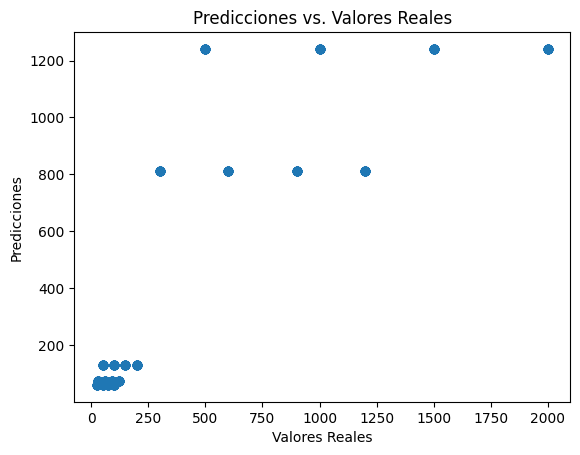

In [389]:
# Gráfico de dispersión de las predicciones vs. valores reales
plt.scatter(y_test, y_pred_lgbm)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

* Seleccionar el mejor modelo basado en las métricas obtenidas.

De entre todos los modelos el que tiene scores mejores distribuidos para cada cantidad son los KNN.

## Parte 4: Análisis de Métricas

### 1. Informe de Clasificación:

* Generar un informe de resultados para los modelos evaluados.

In [390]:
resultados = [
    ("Regresión Lineal", r2_lr, rmse_lr, mse_lr, mae_lr),
    ("KNN", r2_knn, rmse_knn, mse_knn, mae_knn),
    ("Random Forests", r2_knn, rmse_knn, mse_knn, mae_knn),
    ("LGBM", r2_lgbm, rmse_lgbm, mse_lgbm, mae_lgbm),
]

cabecera = ["Método", "R2", "RMSE", "MSE", "MAE"]

df_resultados = pd.DataFrame(resultados, columns=cabecera)

df_resultados

,Método,R2,RMSE,MSE,MAE
0,Regresión Lineal,0.719948,294.535776,86751.323333,187.310000
1,KNN,0.707200,301.164802,90700.237910,187.349638
2,Random Forests,0.707200,301.164802,90700.237910,187.349638
3,LGBM,0.717527,295.806161,87501.285024,185.956327


De los resultados, podemos determinar que el modelo con menores errores en RMSE, MSE, y MSE, y un mayor R2 es el de la Regresión Lineal. Por lo cual, este método de predicción es el elegido.

In [391]:
camino_reporte = "../reports/report.txt"


with open(camino_reporte, "w") as f:
    f.write("Modelo\t\t\t\tR2\t\tRMSE\t\tMSE\t\t\tMAE")

    f.write("\n\n")
    f.write(f"Regresión Lineal\t{r2_lr:.3f}\t{rmse_lr:.3f}\t\t{mse_lr:.3f}\t{mae_lr:.3f}")
    f.write("\n")
    f.write(f"KNN\t\t\t\t\t{r2_knn:.3f}\t{rmse_knn:.3f}\t\t{mse_knn:.3f}\t{mae_knn:.3f}")
    f.write("\n")
    f.write(f"Random Forests\t\t{r2_rf:.3f}\t{rmse_rf:.3f}\t\t{mse_rf:.3f}\t{mae_rf:.3f}")
    f.write("\n")
    f.write(f"LGBM\t\t\t\t{r2_lgbm:.3f}\t{rmse_lgbm:.3f}\t\t{mse_lgbm:.3f}\t{mae_lgbm:.3f}")

### 2. Curva ROC y AUC:

Este tipo de curvas no aplica para regresiones. Por lo cual, se graficarán todos los resultados juntos para mejor visualización de los valores reales vs los predichos.

In [392]:
params_knn_str = ""

for clave, valor in params_knn.items():
    params_knn_str += f"{clave}={valor},"

params_knn_str = params_knn_str.rstrip(",")

params_rf_str = ""

for clave, valor in params_rf.items():
    params_rf_str += f"{clave}={valor},"

params_rf_str = params_rf_str.rstrip(",")

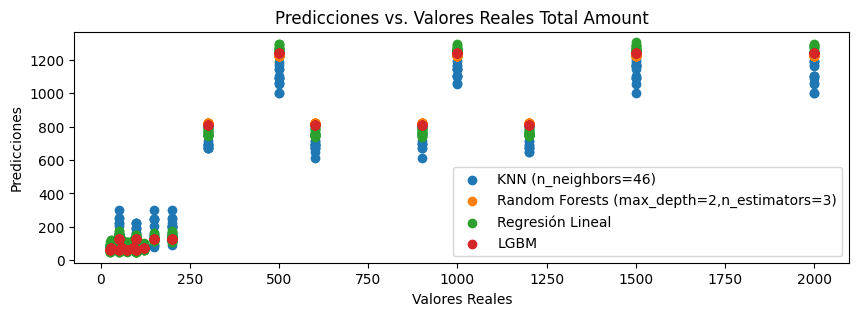

In [393]:
# Gráfico de dispersión de las predicciones vs. valores reales
plt.figure(figsize=(10, 3))
plt.scatter(y_test, y_pred_knn, label=f"KNN ({params_knn_str})")
plt.scatter(y_test, y_pred_rf, label=f"Random Forests ({params_rf_str})")
plt.scatter(y_test, y_pred_lr, label="Regresión Lineal")
plt.scatter(y_test, y_pred_lgbm, label="LGBM")
plt.legend(loc='lower right')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales Total Amount')
camino_salida = "../reports/predicciones.png"
plt.savefig(camino_salida, dpi='figure', format=None)
plt.show()

## Parte 5: Presentación de Resultados

Presentación disponinble [aquí](../presentation/onepage_presentation.pptx).

![image info](../presentation/onepage_presentation.jpg)